In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def initialize_centroids(self, data):
        # indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        # centroids = data[indices]
        random_indices = np.random.randint(data.shape[0], size=self.n_clusters)
        print("hello")
        print("data")
        print(data.shape)
        centroids = data[random_indices]
        print(f"this is the f{centroids}")
        return centroids

    def assign_to_clusters(self, data, centroids):
        clusters = []

        for point in data:
            distances = []
            for centroid in centroids:

                # Euclidean distance
                distance = np.sqrt(np.sum((point - centroid) ** 2))
                distances.append(distance)

            # min_distance = 888
            # for i, distance in enumerate(distances):
            #     if (distance < min_distance):
            #         min_distance = distance
            #         closest = i

            closest=np.argmin(distances)

            clusters.append(closest)

        # Convert the list of cluster assignments to a numpy array and return
        return clusters

    def update_centroids(self, data, clusters):
        new_centroids = []

        for i in range(self.n_clusters):
            # Initialize sum for each dimension of centroid
            centroid_sum = [0] * len(data[0])  # list of zeroes
            count = 0

            # Accumulate sum of each dimension for points in cluster i
            for j in range(len(clusters)):
                if clusters[j] == i:
                    count += 1
                    for dim in range(len(data[j])):
                        centroid_sum[dim] += data[j][dim]

            # Calculate centroid as mean of points in cluster i
            if count > 0:
                for dim in range(len(centroid_sum)):
                    centroid_sum[dim] /= count
                centroid = centroid_sum

            else:
                # If no points assigned to cluster, set centroid to zero
                centroid = [0] * len(data[0])

            new_centroids.append(centroid)

        return new_centroids

    def fit(self, data):
        centroids = self.initialize_centroids(data)

        for _ in range(self.max_iterations):
            clusters = self.assign_to_clusters(data, centroids)
            new_centroids = self.update_centroids(data, clusters)

            if np.array_equal(centroids, new_centroids):
                break

            centroids = new_centroids

        self.cen = centroids
        self.lab = clusters


In [4]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import drive
import sys
import csv
drive.mount('/content/drive')
iris = pd.read_csv('/content/drive/MyDrive/Datasets/iris_csv (1).csv')
iris
data = iris.iloc[:, 2:4].values
iris['class'].unique()
data.shape
data[3]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([1.5, 0.2])

In [5]:
k = 4
model = KMeansCustom(n_clusters=k)
model.fit(data)

hello
data
(150, 2)
this is the f[[1.5 0.2]
 [5.5 1.8]
 [4.8 1.8]
 [1.5 0.3]]


[[1.40769231 0.20512821]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]
 [1.66363636 0.38181818]]


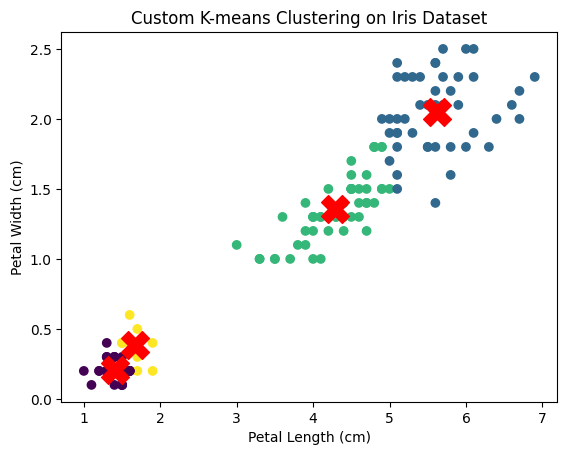

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=model.lab)
centroids_array = np.array(model.cen)  # Convert centroids to a NumPy array
print(centroids_array)
plt.scatter(centroids_array[:, 0], centroids_array[:, 1],marker='X',s=400, c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Custom K-means Clustering on Iris Dataset')
plt.show()
